In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
url = 'https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv'
data = pd.read_csv(url)
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.5600

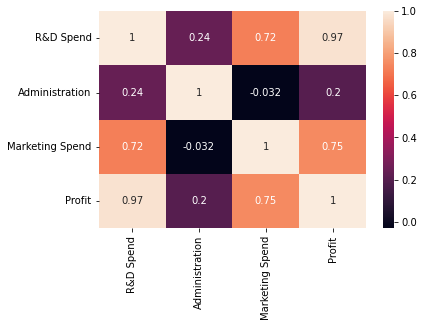

In [4]:
# display the first 5 rows of the dataset
print(data.head())

# display the summary statistics of the numerical columns
print(data.describe())

# display the number of null values in each column
print(data.isnull().sum())

# visualize the correlation between the numerical columns
sns.heatmap(data.corr(), annot=True)
plt.show()

In [5]:
# separate the input (X) and output (y) variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# encode the categorical variable 'State' using one-hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [70]:
# create and train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# predict the profits on the test set
y_pred = regressor.predict(X_test)

# compare the predicted and actual profits
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

# evaluate the model's performance
from sklearn.metrics import r2_score
print('R-squared:', r2_score(y_test, y_pred))

      Actual      Predicted
0  103282.38  103015.201598
1  144259.40  132582.277608
2  146121.95  132447.738452
3   77798.83   71976.098513
4  191050.39  178537.482211
5  105008.31  116161.242302
6   81229.06   67851.692097
7   97483.56   98791.733747
8  110352.25  113969.435330
9  166187.94  167921.065696
R-squared: 0.9347068473282515


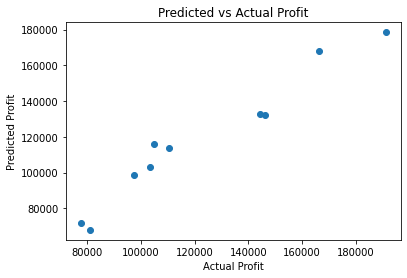

In [8]:
# visualize the predicted vs actual profits
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Predicted vs Actual Profit')
plt.show()

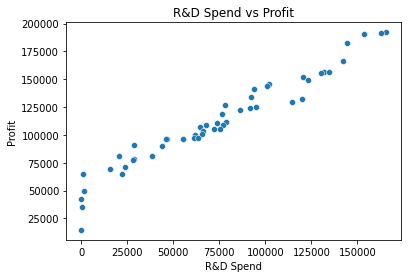

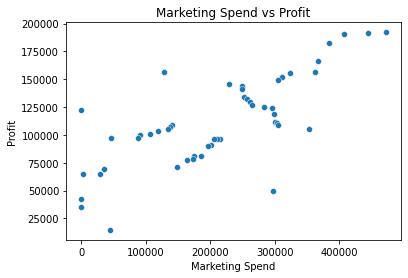

In [9]:
# visualize the relationship between R&D spending and profit
sns.scatterplot(x=data['R&D Spend'], y=data['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('R&D Spend vs Profit')
plt.show()

# visualize the relationship between marketing spending and profit
sns.scatterplot(x=data['Marketing Spend'], y=data['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs Profit')
plt.show()


In [10]:
# save the model
import joblib
joblib.dump(regressor, 'startup_profit_prediction_model.joblib')

['startup_profit_prediction_model.joblib']

In [11]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=6c35329d569b4729186300d1d13449837030109abd85

In [131]:
# import the necessary libraries
%%writefile startup.py
import streamlit as st
import joblib
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# load the saved model
model = joblib.load('startup_profit_prediction_model.joblib')

# load the startup dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# encode the categorical 'state' column using LabelEncoder and OneHotEncoder
# encode the categorical 'state' column using LabelEncoder and OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

labelencoder = LabelEncoder()
state_encoded = labelencoder.fit_transform(['California', 'Florida', 'New York']).reshape(1, -1)

# define the app
def app():
    # Set page title
    st.set_page_config(page_title='Startup Profit Prediction', page_icon=':money_with_wings:')

    # Set heading
    st.title('Startup Profit Prediction')

    # Get user input
    rd_spend = st.number_input('R&D Spend')
    admin_spend = st.number_input('Administration Spend')
    marketing_spend = st.number_input('Marketing Spend')
    state = st.selectbox('State', options=['California', 'Florida', 'New York'])

    # Encode user input for state using LabelEncoder and OneHotEncoder
    state_encoded = labelencoder.transform([state]).reshape(1, -1)
    

    # Make prediction
    prediction = model.predict(np.concatenate(([[rd_spend, admin_spend, marketing_spend]], state_encoded), axis=1))

    # Show prediction result
    st.write('The predicted profit for the startup is:', round(prediction[0], 2))

app()





Overwriting startup.py


In [132]:
!streamlit run startup.py &npx localtunnel --port 8501

npx: installed 22 in 2.474s



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.91.111.108:8501

your url is: https://light-worms-report-34-91-111-108.loca.lt
  Stopping...
^C
